In [13]:
import pandas as pd
import matplotlib. pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
train = pd.read_csv("/Users/mingu/Desktop/CODING/2024_1 Machine Learning/Kaggle Project 2/DATASET/train.csv").drop("~", axis = 1) #경로지정
test = pd.read_csv("/Users/mingu/Desktop/CODING/2024_1 Machine Learning/Kaggle Project 2/DATASET/test.csv").drop("No", axis = 1)
sample_sub = pd.read_csv("/Users/mingu/Desktop/CODING/2024_1 Machine Learning/Kaggle Project 2/DATASET/submission.csv")

In [6]:
x = train.drop("Death", axis = 1)
y = train["Death"]

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [8]:
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=0)

# Logistic Regression

In [9]:
#Fitting simple linear regression to the training test
Model1 = LogisticRegression()
Model1.fit(x_train, y_train)
#Predicting the test set results
prediction1 = Model1.predict(x_test)

/Users/mingu/miniforge3/envs/ai/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
prediction1

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
confusion_matrix(y_test,prediction1)

array([[2652,    0],
       [ 682,    0]])

In [12]:
accuracy_score(y_test,prediction1)

0.7954409118176364

In [13]:
from sklearn.metrics import precision_score
probs = Model1.predict_proba(x_test)
precision_score(y_test, prediction1, average = None)

/Users/mingu/miniforge3/envs/ai/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([0.79544091, 0.        ])

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score

# assuming your predicted and actual labels are stored in variables y_pred and y_true, respectively
accuracy = accuracy_score(y_test, prediction1)
precision = precision_score(y_test, prediction1)
recall = recall_score(y_test, prediction1)
f1 = f1_score(y_test, prediction1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.7954409118176364
Precision: 0.0
Recall: 0.0
F1 score: 0.0


/Users/mingu/miniforge3/envs/ai/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [16]:
recall_score(y_test, prediction1, average = None)

array([1., 0.])

In [17]:
 f1_score(y_test, prediction1, average = None)

array([0.88606749, 0.        ])

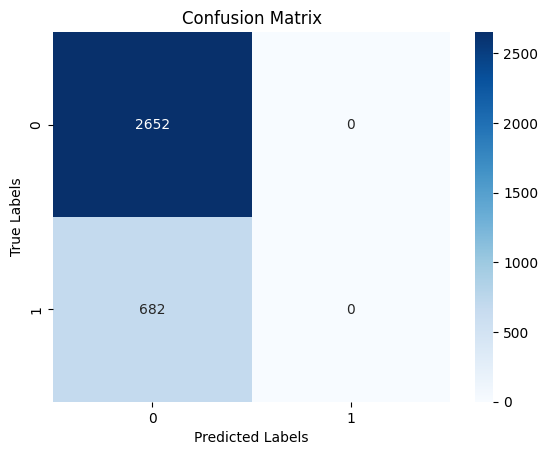

In [18]:
cm = confusion_matrix(y_true = y_test, y_pred = prediction1)
#plot_confusion_matrix(cm,level,title = "confusion_matrix")
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# KNN

In [19]:
 from sklearn.neighbors import KNeighborsClassifier

In [20]:
#Fitting K-NN to the Training set
classifier = KNeighborsClassifier(n_neighbors = 3, metric = "minkowski", p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
#Predicting the Test set result
prediction2 = classifier.predict(x_test)

In [22]:
prediction2

array([1, 0, 0, ..., 0, 0, 0])

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
confusion_matrix(y_test,prediction2)

array([[2324,  328],
       [ 597,   85]])

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

# assuming your predicted and actual labels are stored in variables y_pred and y_true, respectively
accuracy = accuracy_score(y_test, prediction2)
precision = precision_score(y_test, prediction2)
recall = recall_score(y_test, prediction2)
f1 = f1_score(y_test, prediction2)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.7225554889022195
Precision: 0.20581113801452786
Recall: 0.12463343108504399
F1 score: 0.1552511415525114


In [25]:
accuracy_score(y_test,prediction2)

0.7225554889022195

In [26]:
probs = Model1.predict_proba(x_test)
precision_score(y_test, prediction2, average = None)

array([0.79561794, 0.20581114])

In [27]:
recall_score(y_test, prediction2, average = None)

array([0.87631976, 0.12463343])

In [28]:
f1_score(y_test, prediction2, average = None)

array([0.83402117, 0.15525114])

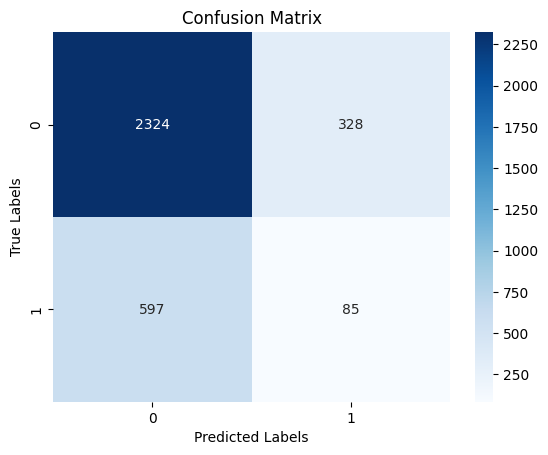

In [29]:
cm = confusion_matrix(y_true = y_test, y_pred = prediction2)
#plot_confusion_matrix(cm,level,title = "confusion_matrix")
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [8]:
# stratified k-fold cross-validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# prepare the cross-validation procedure
cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# create model
x = train.drop("Death", axis = 1)
y = train["Death"]

model_list = []

for train_index, test_index in cv.split(x, y):
    x_train, x_test = x.loc[train_index], x.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    model = KNeighborsClassifier(n_neighbors = 3, metric = "minkowski", p = 2)
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 score:", f1)
    model_list.append(model)

Accuracy: 0.7175
Precision: 0.19665271966527198
Recall: 0.11190476190476191
F1 score: 0.1426403641881639
Accuracy: 0.73
Precision: 0.2222222222222222
Recall: 0.11428571428571428
F1 score: 0.1509433962264151
Accuracy: 0.7205
Precision: 0.19736842105263158
Recall: 0.10688836104513064
F1 score: 0.1386748844375963
Accuracy: 0.7205
Precision: 0.1891891891891892
Recall: 0.0997624703087886
F1 score: 0.13063763608087092
Accuracy: 0.736
Precision: 0.24401913875598086
Recall: 0.12114014251781473
F1 score: 0.1619047619047619


In [11]:
predict_list = []
for model in model_list:
    predicts = model.predict(test)
    predict_list.append(predicts)
    print(sum(predicts))

print(predict_list)

606
579
588
572
591
[array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 1, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 0])]


In [14]:
predict_list = np.array(predict_list)
final_predict = np.mean(predict_list, axis = 0)

In [19]:
sample_sub["Death"] = final_predict
sample_sub["Death"].value_counts()

Death
0.0    3802
0.2     445
0.6     276
0.8     188
0.4     178
1.0     111
Name: count, dtype: int64

In [20]:
sample_sub['Death'] = np.where(sample_sub['Death'] > 0.7, 1, 0)
sample_sub["Death"].value_counts()

Death
0    4701
1     299
Name: count, dtype: int64

In [21]:
sample_sub.to_csv("/Users/mingu/Desktop/CODING/2024_1 Machine Learning/Kaggle Project 2/SUBMISSION/5_13_2.csv", index = False)

# Decision Tree

In [30]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 0,criterion = "entropy")
tree.fit(x_train, y_train)
prediction3 = classifier.predict(x_test)

In [31]:
prediction3

array([1, 0, 0, ..., 0, 0, 0])

In [32]:
confusion_matrix(y_test,prediction3)

array([[2324,  328],
       [ 597,   85]])

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score

# assuming your predicted and actual labels are stored in variables y_pred and y_true, respectively
accuracy = accuracy_score(y_test, prediction3)
precision = precision_score(y_test, prediction3)
recall = recall_score(y_test, prediction3)
f1 = f1_score(y_test, prediction3)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.7225554889022195
Precision: 0.20581113801452786
Recall: 0.12463343108504399
F1 score: 0.1552511415525114


In [34]:
accuracy_score(y_test,prediction3)

0.7225554889022195

In [35]:
probs = Model1.predict_proba(x_test)
precision_score(y_test, prediction3, average = None)

array([0.79561794, 0.20581114])

In [36]:
recall_score(y_test, prediction3, average = None)

array([0.87631976, 0.12463343])

In [37]:
f1_score(y_test, prediction3, average = None)

array([0.83402117, 0.15525114])

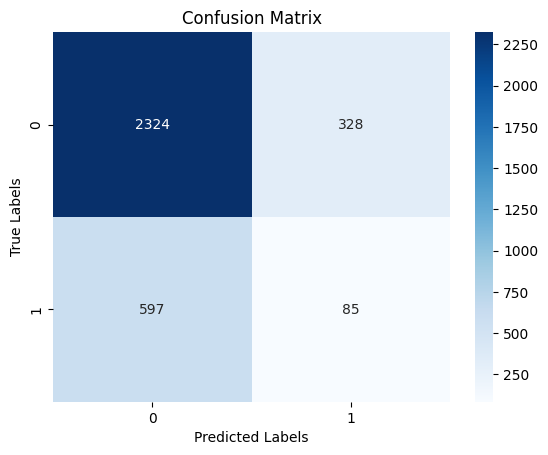

In [38]:
cm = confusion_matrix(y_true = y_test, y_pred = prediction3)
#plot_confusion_matrix(cm,level,title = "confusion_matrix")
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# SVM

In [39]:
#Support Vector Machine
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
svm = OneVsRestClassifier(BaggingClassifier(SVC(C=10,kernel='rbf',random_state=9,probability=True),n_jobs=-1))
svm.fit(x_train, y_train)
prediction4 = svm.predict(x_test)

In [40]:
confusion_matrix(y_test,prediction4)

array([[2652,    0],
       [ 682,    0]])

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score

# assuming your predicted and actual labels are stored in variables y_pred and y_true, respectively
accuracy = accuracy_score(y_test, prediction4)
precision = precision_score(y_test, prediction4)
recall = recall_score(y_test, prediction4)
f1 = f1_score(y_test, prediction4)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.7954409118176364
Precision: 0.0
Recall: 0.0
F1 score: 0.0


/Users/mingu/miniforge3/envs/ai/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [42]:
accuracy_score(y_test,prediction4)

0.7954409118176364

In [43]:
probs = Model1.predict_proba(x_test)
precision_score(y_test, prediction4, average = None)

/Users/mingu/miniforge3/envs/ai/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([0.79544091, 0.        ])

In [44]:
recall_score(y_test, prediction4, average = None)

array([1., 0.])

In [45]:
f1_score(y_test, prediction4, average = None)

array([0.88606749, 0.        ])

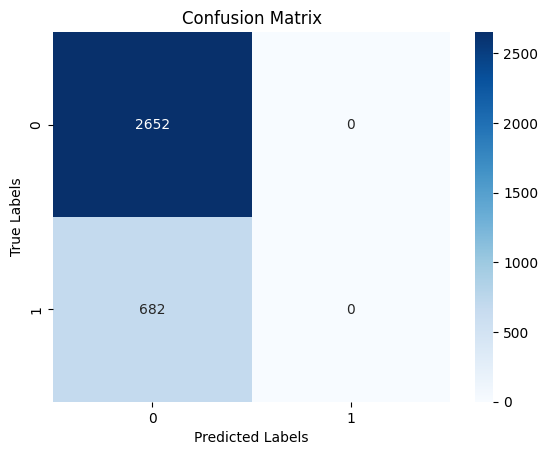

In [46]:
cm = confusion_matrix(y_true = y_test, y_pred = prediction4)
#plot_confusion_matrix(cm,level,title = "confusion_matrix")
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB
nbcla = GaussianNB()
nbcla.fit(x_train, y_train)
prediction5 = nbcla.predict(x_test)

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
confusion_matrix(y_test,prediction5)

array([[2650,    2],
       [ 679,    3]])

In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score

# assuming your predicted and actual labels are stored in variables y_pred and y_true, respectively
accuracy = accuracy_score(y_test, prediction5)
precision = precision_score(y_test, prediction5)
recall = recall_score(y_test, prediction5)
f1 = f1_score(y_test, prediction5)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.795740851829634
Precision: 0.6
Recall: 0.004398826979472141
F1 score: 0.008733624454148471


In [50]:
accuracy_score(y_test,prediction5)

0.795740851829634

In [51]:
probs = Model1.predict_proba(x_test)
precision_score(y_test, prediction5, average = None)

array([0.79603485, 0.6       ])

In [52]:
recall_score(y_test, prediction5, average = None)

array([0.99924585, 0.00439883])

In [53]:
f1_score(y_test, prediction5, average = None)

array([0.88613944, 0.00873362])

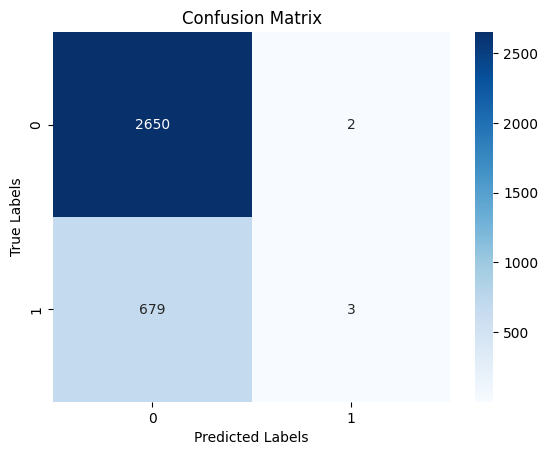

In [54]:
cm = confusion_matrix(y_true = y_test, y_pred = prediction5)
#plot_confusion_matrix(cm,level,title = "confusion_matrix")
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# RANDOM FOREST

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using training dataset
rf_classifier.fit(x_train, y_train)

# Make predictions on test dataset
prediction6 = rf_classifier.predict(x_test)

# Evaluate the accuracy of the model
#accuracy = rf_classifier.score(x_test, y_test)
#print("Accuracy:", accuracy)

In [56]:
confusion_matrix(y_test,prediction6)

array([[2652,    0],
       [ 682,    0]])

In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score

# assuming your predicted and actual labels are stored in variables y_pred and y_true, respectively
accuracy = accuracy_score(y_test, prediction6)
precision = precision_score(y_test, prediction6)
recall = recall_score(y_test, prediction6)
f1 = f1_score(y_test, prediction6)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.7954409118176364
Precision: 0.0
Recall: 0.0
F1 score: 0.0


/Users/mingu/miniforge3/envs/ai/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [58]:
accuracy_score(y_test,prediction6)

0.7954409118176364

In [59]:
probs = Model1.predict_proba(x_test)
precision_score(y_test, prediction6, average = None)

/Users/mingu/miniforge3/envs/ai/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([0.79544091, 0.        ])

In [60]:
recall_score(y_test, prediction6, average = None)

array([1., 0.])

In [61]:
f1_score(y_test, prediction6, average = None)

array([0.88606749, 0.        ])

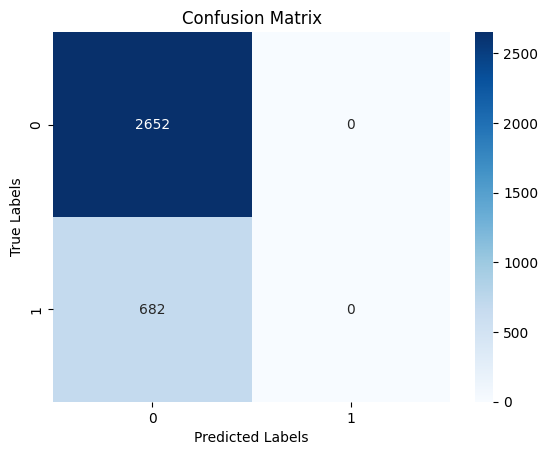

In [62]:
cm = confusion_matrix(y_true = y_test, y_pred = prediction6)
#plot_confusion_matrix(cm,level,title = "confusion_matrix")
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

========================================================================================================================